## <center>LDA dimension reduction</center>


Besides classifying, LDA enables to perform dimension reduction. LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes. LDA tries to find a decision boundary around each cluster of a class. It then projects the data points to new dimensions in a way that the clusters are as separate from each other as possible and the individual elements within a cluster are as close to the centroid of the cluster as possible. The new dimensions are ranked on the basis of their ability to maximize the distance between the clusters and minimize the distance between the data points within a cluster and their centroids. These new dimensions form the linear discriminants of the feature set.

It is important to mention, that only LDA can perform this dimension reduction, QDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
dat_train = pd.read_excel('vowels.xlsx', sheet_name="Train")
dat_train.drop(columns="row.names", inplace=True)
dat_train.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [3]:
dat_test = pd.read_excel('vowels.xlsx', sheet_name="Test")
dat_test.drop(columns="row.names", inplace=True)
dat_test.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
1,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
2,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
3,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
4,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471


              precision    recall  f1-score   support

           1       0.47      0.67      0.55        42
           2       0.39      0.38      0.39        42
           3       0.47      0.38      0.42        42
           4       0.69      0.79      0.73        42
           5       0.28      0.17      0.21        42
           6       0.25      0.45      0.32        42
           7       0.46      0.26      0.33        42
           8       0.70      0.55      0.61        42
           9       0.37      0.36      0.36        42
          10       0.36      0.31      0.33        42
          11       0.52      0.57      0.55        42

    accuracy                           0.44       462
   macro avg       0.45      0.44      0.44       462
weighted avg       0.45      0.44      0.44       462



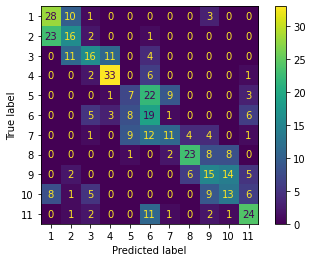

In [4]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(dat_train.drop('y', axis=1), dat_train['y'])

y_pred = lda.predict(dat_test.drop('y', axis=1))

plot_confusion_matrix(lda, dat_test.drop('y', axis=1), dat_test['y'])
print(classification_report(dat_test['y'],y_pred))

              precision    recall  f1-score   support

           1       0.55      0.67      0.60        42
           2       0.36      0.38      0.37        42
           3       0.79      0.26      0.39        42
           4       0.63      0.64      0.64        42
           5       0.73      0.45      0.56        42
           6       0.32      0.38      0.35        42
           7       0.54      0.62      0.58        42
           8       0.62      0.62      0.62        42
           9       0.51      0.50      0.51        42
          10       0.52      0.31      0.39        42
          11       0.41      0.76      0.53        42

    accuracy                           0.51       462
   macro avg       0.54      0.51      0.50       462
weighted avg       0.54      0.51      0.50       462



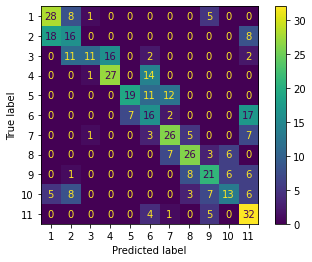

In [5]:
# Linear Discriminant Analysis
lda_dimen = LinearDiscriminantAnalysis(n_components=2)

y_train = dat_train['y']
y_test = dat_test['y']

X_train = lda_dimen.fit_transform(dat_train.drop('y', axis=1), y_train)
X_test = lda_dimen.transform(dat_test.drop('y', axis=1))



lda = LinearDiscriminantAnalysis()


lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

plot_confusion_matrix(lda, X_test, y_test)
print(classification_report(y_test,y_pred))